Get the implicit utility function.

In [86]:
struct Calibration
    σ::Float64           #elasticity of relative demand with respect to price         
    γ::Vector{Float64}   #intensity in each good
    ϵ::Vector{Float64}   #elasticity of relative demand with respect to income in luxury good sector
    κ::Vector{Float64}   #For Stone and Geary
    g::Vector{Float64}
end

In [87]:
cal = Calibration(
    0.2,                    # sigma=0.5 completementary goods
    [1/3, 1/3, 1/3],        #intensity
    [0.6, 1.0, 1.5],       #ELASTICITIES
    [0.05, 0.03, 0.02],     #For Stone and Geary
    [1.05, 1.02, 1.01]
)

Calibration(0.2, [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.6, 1.0, 1.5], [0.05, 0.03, 0.02], [1.05, 1.02, 1.01])

In [88]:
ρ=(cal.σ-1)/cal.σ

-4.0

# CES utility function

$$E=\sum^{\mathcal{I}}_{i=1}p_iC_i$$

$$C_i^*= \left(\frac{\gamma_i}{p_i}\right)^\sigma \frac{E}{\sum^{\mathcal{I}}_{i=1}\gamma_i^\sigma p_i^{1-\sigma}}$$

$$U(C_1^*,...,C_I^*)=\left[\sum^{\mathcal{I}}_{i=1}\gamma_iC_i^{* \rho} \right]^{\frac{1}{\rho}}

In [126]:
#Function CES
function CES_Utility(C::Vector{Float64}, p::Vector{Float64}; cal=cal)
    #Budget, expenditure function
    E=sum(p[i]*C[i] for i = 1:length(C))
    
    #CONS
    C1=(cal.γ[1]/p[1])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[i]^(1-cal.σ) for i=1:length(cal.γ)))
    C2=(cal.γ[2]/p[2])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[i]^(1-cal.σ) for i=1:length(cal.γ)))
    C3=(cal.γ[3]/p[3])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[i]^(1-cal.σ) for i=1:length(cal.γ)))

    CB=[C1 C2 C3]
    U=sum(cal.γ[i]*CB[i]^ρ for i=1:length(CB))^(1/ρ)


    #SHARE
    ω_p=(p[1]*C1)/E
    ω_n=(p[2]*C2)/E
    ω_l=(p[3]*C3)/E

    return [U, E, C, [C1, C2, C3], [ω_p, ω_n, ω_l]]
end

CES_Utility (generic function with 1 method)

In [128]:
#Insert an Endowment bundle
U=CES_Utility([10.0, 20.0, 5.0],[5.0, 20.0, 70.0])
println("Utility level reached ", U[1])
println("Expenditure/Wealth level ", U[2])
println("Initial Endowment ", U[3])
println("Optimal Endowment given prices ", U[4])
println("Expenditure share per good ", U[5])

Utility level reached 9.150869076352485
Expenditure/Wealth level 800.0
Initial Endowment [10.0, 20.0, 5.0]
Optimal Endowment given prices [13.018759945356514, 9.866375062299438, 7.6796957003889785]
Expenditure share per good [0.08136724965847822, 0.24665937655748596, 0.6719733737840357]


In [129]:
p=[5.0, 20.0, 70.0]

3-element Vector{Float64}:
  5.0
 20.0
 70.0

In [130]:
u=[]
C=[]
Co=[]

scale=5.0
for i = 1:scale
    for j=1:scale
        for k =1:scale
            res =CES_Utility([i,j,k],p)
            u=push!(u,res[1])
            Co=push!(Co, res[4])
            C=push!(C,[i j k])
        end
    end
end

[u C Co]


125×3 Matrix{Any}:
 1.08667  [1.0 1.0 1.0]  [1.54598, 1.17163, 0.911964]
 1.88737  [1.0 1.0 2.0]  [2.68512, 2.03494, 1.58394]
 2.68807  [1.0 1.0 3.0]  [3.82426, 2.89825, 2.25591]
 3.48877  [1.0 1.0 4.0]  [4.9634, 3.76156, 2.92788]
 4.28947  [1.0 1.0 5.0]  [6.10254, 4.62486, 3.59986]
 1.31544  [1.0 2.0 1.0]  [1.87145, 1.41829, 1.10396]
 2.11614  [1.0 2.0 2.0]  [3.01059, 2.2816, 1.77593]
 2.91684  [1.0 2.0 3.0]  [4.14973, 3.14491, 2.4479]
 3.71754  [1.0 2.0 4.0]  [5.28887, 4.00821, 3.11988]
 4.51824  [1.0 2.0 5.0]  [6.42801, 4.87152, 3.79185]
 ⋮                       
 2.80245  [5.0 4.0 2.0]  [3.987, 3.02158, 2.35191]
 3.60315  [5.0 4.0 3.0]  [5.12614, 3.88489, 3.02388]
 4.40386  [5.0 4.0 4.0]  [6.26528, 4.74819, 3.69585]
 5.20456  [5.0 4.0 5.0]  [7.40442, 5.6115, 4.36783]
 2.23052  [5.0 5.0 1.0]  [3.17332, 2.40493, 1.87193]
 3.03123  [5.0 5.0 2.0]  [4.31246, 3.26824, 2.5439]
 3.83193  [5.0 5.0 3.0]  [5.45161, 4.13154, 3.21587]
 4.63263  [5.0 5.0 4.0]  [6.59075, 4.99485, 3.88785]
 5.4333

In [131]:
p

3-element Vector{Float64}:
  5.0
 20.0
 70.0

In [132]:
using DataFrames
function prices(p::Vector{Float64},T::Int64 ;cal=cal)
    #Prices normalized at date t=1
    pp=[p[1]]  #price primary
    pn=[p[2]]  #price normal
    pl=[p[3]]  #price luxury
    #Relative prices
    pnp_r=[1.0]
    pnl_r=[1.0]
    #AR(1)
    shock_size=1

    for t=1:T-1
        p_p=p[1]*cal.g[1]^(t)+shock_size*randn() # price dynamics of primary goods
        p_n=p[2]*cal.g[2]^(t)+shock_size*randn() # price dynamics of normal goods
        p_l=p[3]*cal.g[3]^(t)+shock_size*randn()

        pnp=p_p/p_n
        pnl=p_l/p_n

        #for matrix
        pp=push!(pp,p_p)
        pn=push!(pn,p_n)
        pl=push!(pl,p_l)

        pnp_r=push!(pnp_r,pnp)
        pnl_r=push!(pnl_r,pnl)
        
    end
    return [pp pn pl]
end

T=30
p=prices([5.0, 20.0, 70.0],T)

data=DataFrame(p,:auto)

rename!(data,[:"Primary P",:"Normal P", :"LuxuryP"])

,Primary P,Normal P,LuxuryP
,Float64,Float64,Float64
1,5.0,20.0,70.0
2,5.18099,19.7547,70.28
3,5.70518,20.5748,72.1001
4,5.27457,22.3318,69.573
5,7.31126,23.1539,73.5844
6,6.5612,23.3013,73.4747
7,9.36154,21.7641,74.6474
8,6.12142,22.7136,75.5377
9,8.64681,23.0633,74.8258


In [133]:
p

30×3 Matrix{Float64}:
  5.0      20.0     70.0
  5.18099  19.7547  70.28
  5.70518  20.5748  72.1001
  5.27457  22.3318  69.573
  7.31126  23.1539  73.5844
  6.5612   23.3013  73.4747
  9.36154  21.7641  74.6474
  6.12142  22.7136  75.5377
  8.64681  23.0633  74.8258
  7.17134  22.8712  76.3263
  ⋮                 
 15.4794   29.2194  87.3445
 15.193    32.9248  86.2169
 14.4523   32.2587  88.3185
 14.3559   31.8752  87.1833
 14.7742   32.3183  91.0322
 18.3183   32.5256  88.939
 17.6081   31.8938  93.2562
 19.9866   35.3824  90.8872
 21.3904   35.6946  93.4683

In [134]:
#Function CES
function CES_UtilityOvertime(C::Vector{Float64}, p::Matrix{Float64}, T::Int64; cal=cal)
    #Budget, expenditure function
    Exp=[]
    Cons=[]
    Share=[]
    Utility=[]

    for t=1:T
        E=sum(p[t,i]*C[i] for i = 1:length(C))
        
        #CONS
        C1=(cal.γ[1]/p[t,1])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[t,i]^(1-cal.σ) for i=1:length(cal.γ)))
        C2=(cal.γ[2]/p[t,2])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[t,i]^(1-cal.σ) for i=1:length(cal.γ)))
        C3=(cal.γ[3]/p[t,3])^(cal.σ)*E/(sum(cal.γ[i]^cal.σ*p[t,i]^(1-cal.σ) for i=1:length(cal.γ)))

        CB=[C1 C2 C3]
        U=sum(cal.γ[i]*CB[i]^ρ for i=1:length(CB))^(1/ρ)


        #SHARE
        ω_p=(p[t,1]*C1)/E
        ω_n=(p[t,2]*C2)/E
        ω_l=(p[t,3]*C3)/E

        ω=[ω_p,ω_n,ω_l]

        Exp=push!(Exp,E)
        Cons=push!(Cons,CB)
        Utility=push!(Utility,U)
        Share=push!(Share, ω)

    end

    return [Utility Exp Cons Share]
end

CES_UtilityOvertime (generic function with 1 method)

In [138]:
V=CES_UtilityOvertime([10.0, 20.0, 5.0], p, 30)

30×4 Matrix{Any}:
 9.15087   800.0    …  [0.0813672, 0.246659, 0.671973]
 9.10785   798.305     [0.0835418, 0.243731, 0.672727]
 9.13036   829.049     [0.0877238, 0.244777, 0.667499]
 9.41944   847.247     [0.0830113, 0.263346, 0.653642]
 9.31822   904.113     [0.101451, 0.255131, 0.643417]
 9.35778   899.011  …  [0.0937753, 0.258467, 0.647757]
 9.10081   902.135     [0.121535, 0.23868, 0.639786]
 9.24824   893.175     [0.0883397, 0.252175, 0.659485]
 9.24119   921.864     [0.113478, 0.24875, 0.637773]
 9.21309   910.769     [0.0984132, 0.248888, 0.652698]
 ⋮                  ⋱  
 9.35442  1175.9       [0.150278, 0.249821, 0.599901]
 9.67507  1241.51      [0.145631, 0.270369, 0.584]
 9.58024  1231.29      [0.139746, 0.265648, 0.594607]
 9.58132  1216.98      [0.140318, 0.265615, 0.594067]
 9.5122   1249.27   …  [0.139791, 0.261478, 0.598731]
 9.53638  1278.39      [0.163327, 0.258543, 0.57813]
 9.39451  1280.24      [0.156175, 0.251193, 0.592632]
 9.67459  1361.95      [0.168401, 0.265

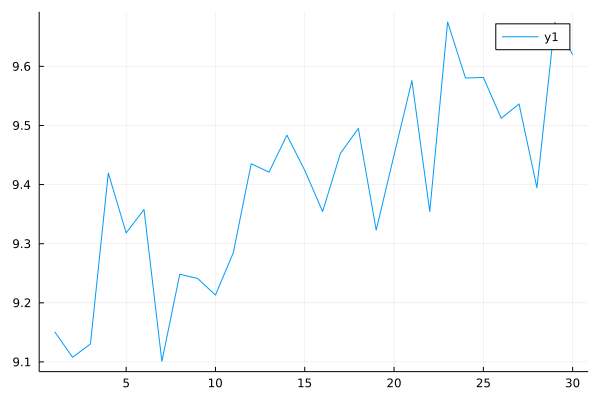

In [140]:
using Plots
#Expenditure / Wealth following fixed endowment
U=V[:,1]
plot(U)

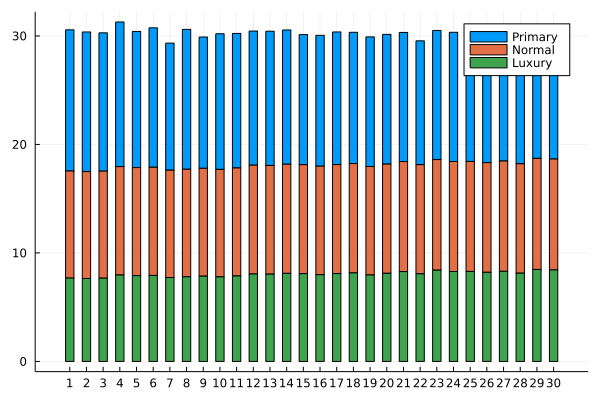

In [141]:
using StatsPlots
T=30
Primary=[]
Normal=[]
Luxury=[]
for t=1:T
    p=V[:,3][t][1]
    n=V[:,3][t][2]
    l=V[:,3][t][3]
    Primary=push!(Primary,p)
    Normal=push!(Normal,n)
    Luxury=push!(Luxury,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary Normal Luxury],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

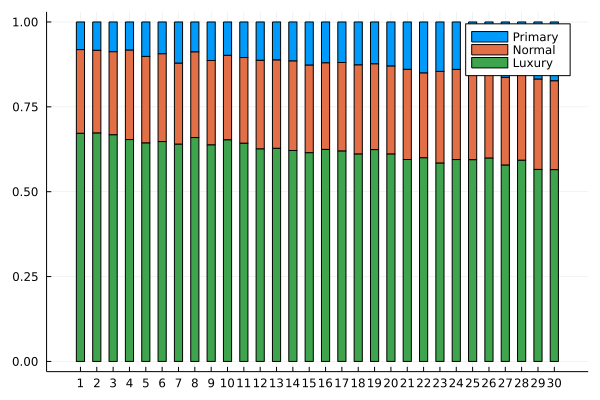

In [142]:
Primary_s=[]
Normal_s=[]
Luxury_s=[]
for t=1:T
    p=V[:,4][t][1]
    n=V[:,4][t][2]
    l=V[:,4][t][3]
    Primary_s=push!(Primary_s,p)
    Normal_s=push!(Normal_s,n)
    Luxury_s=push!(Luxury_s,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary_s Normal_s Luxury_s],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

# Stone and Geary

In [7]:
#Function Stone and Geary
function SG(C::Vector{Int64}, cal)
    U=sum(cal.γ[i]*(C[i]+cal.κ[i])^ρ for i=1:length(C))^(1/ρ)
    return U
end

SG (generic function with 1 method)

# Non Homothetic Utility function

In [89]:
p=[5.0 10.0 30.0]

1×3 Matrix{Float64}:
 5.0  10.0  30.0

In [6]:
function solvingNH(u, C::Vector{Float64}, p::Matrix{Float64}; cal=cal)
    out=[sum(cal.γ[i]^(1/cal.σ)*(C[i]/u^(cal.ϵ[i]))^ρ for i=1:length(C))-1,
        E-sum(p[i]*C[i] for i=1:length(C)),
        u_c1/p[1]=u_c2/p[2],
        u_c1/p[1]=u_c3/p[3],
        u_c2/p[2]=u_c3/p[3]
        ]
    return out
end

solvingNH(1.0,[1.0,2.0,3.0],p)

ErrorException: syntax: misplaced assignment statement in "[(sum((((cal.γ[i] ^ (1 / cal.σ)) * ((C[i] / (u ^ cal.ϵ[i])) ^ ρ)) for i = 1:length(C))) - 1), (E - sum(((p[i] * C[i]) for i = 1:length(C)))), (u_c1 / p[1]) = begin
    # /Users/antoineding/Documents/GitHub/IIRUHH_master/U_find.ipynb, line 4
    (u_c2 / p[2])
end, (u_c1 / p[1]) = begin
    # /Users/antoineding/Documents/GitHub/IIRUHH_master/U_find.ipynb, line 5
    (u_c3 / p[3])
end, (u_c2 / p[2]) = begin
    # /Users/antoineding/Documents/GitHub/IIRUHH_master/U_find.ipynb, line 6
    (u_c3 / p[3])
end]" around /Users/antoineding/Documents/GitHub/IIRUHH_master/U_find.ipynb:2

In [44]:
p

30×3 Matrix{Float64}:
  5.0      10.0      30.0
  3.90382  10.1906   30.1554
  5.49891  10.5024   32.1303
  6.29859  12.3681   36.1115
  7.71619  12.8036   31.2923
  5.58618  15.1813   32.3001
 10.2533    7.60689  33.5554
  5.14757  13.0002   32.8582
 10.2297    9.18291  33.8624
  7.78831  10.6661   29.4752
  ⋮                  
  9.27399  19.3326   40.1166
 15.4733   13.5216   36.1301
 14.4479   17.6585   41.7649
 17.3333   17.9581   38.6295
 15.9087   18.8408   39.5656
 16.0145   18.1249   36.2549
 17.4153   18.27     38.4666
 18.1949   18.0369   36.611
 18.0234   17.2676   38.0397

In [90]:
using NLsolve

function solvingNH(u, C::Vector{Float64}, p::Vector{Float64}; cal=cal)
    out=sum(cal.γ[i]^(1/cal.σ)*(C[i]/u^(cal.ϵ[i]))^ρ for i=1:length(C))-1
    return out
end

nlsolve(u->[solvingNH(u[1],[2.0, 2.0, 2.0], p)], [1.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.0]
 * Zero: [3.9194705137320343]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [91]:
using NLsolve

#UTILITY LEVEL for a given C
function solvingNH(u, C::Vector{Float64}, p::Vector{Float64}; cal=cal)
    out=sum(cal.γ[i]^(1/cal.σ)*(C[i]/u^(cal.ϵ[i]))^ρ for i=1:length(C))-1
    return out
end

function NHUtility(C::Vector{Float64}, p::Matrix{Float64} ;cal=cal,tol=1e-10,T=100)
    res = nlsolve(u->[solvingNH(u[1], C, p)], [1.0])
    #Utility level for given C
    U=res.zero[1]
    #1st utility for given endowment level
    Uinit=res.zero[1]

    #Wealth and Minimum expenditure for the utility at given endowment level
    E=sum(p[i]*C[i] for i=1:length(C))
    Expmini=sum(cal.γ[i]*U^(cal.ϵ[i]*(1-cal.σ)) * (p[i]^(1-cal.σ)) for i = 1:length(C))^(1/(1-cal.σ))
    
    #Optimal Demand with income effect
    C1=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/Expmini)^(-cal.σ)
    C2=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/Expmini)^(-cal.σ)
    C3=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/Expmini)^(-cal.σ)

    #Expenditure share with income effect
    ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/Expmini)^(1-cal.σ)
    ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/Expmini)^(1-cal.σ)
    ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/Expmini)^(1-cal.σ)

    #Initial Demand for given endowment level, U initial and minimum expenditure level
    Cinit=[C1,C2,C3]
    ω_init=[ω_p, ω_n, ω_l]

    #Optimal update for demand
    C=[C1,C2,C3]
    ω=[ω_p, ω_n, ω_l]

    #Non homothetic preferences updated expenditure since we still have some wealth unused.
    ExpNH=sum(p[i]*C[i] for i=1:length(C))

    #Non homothetic preferences Expenditure have to coincide with the endowment level wealth.
    if abs(E-ExpNH)>tol
        for j=1:T
            res=nlsolve(u->[solvingNH(u[1], C, p)], [1.0])
            U=res.zero[1]
            
            #DEMAND
            C1=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/E)^(-cal.σ)
            C2=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/E)^(-cal.σ)
            C3=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/E)^(-cal.σ)

            #SHARE
            ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/E)^(1-cal.σ)
            ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/E)^(1-cal.σ)
            ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/E)^(1-cal.σ)
            C=[C1, C2, C3]
            ω=[ω_p, ω_n, ω_l]
    
            ExpNH=sum(p[i]*C[i] for i =1:length(C)) 
        end
        return [U, Uinit, Expmini, E, ExpNH, C, Cinit, ω, ω_init]
    end
end

NHUtility (generic function with 1 method)

In [92]:
p=[10.0 20.0 100.0]

1×3 Matrix{Float64}:
 10.0  20.0  10.0

In [93]:
NHU=NHUtility([1.0, 5.0, 1.0], p)

9-element Vector{Any}:
   7.265479334832946
   2.4825149778007276
  34.76221579815882
 120.0
 119.99999996933164
    [1.4194557060916233, 2.330882669536425, 5.918778951768691]
    [0.6616805010652708, 0.7705622665135211, 1.2734165457235687]
    [0.11828797550763526, 0.3884804449227374, 0.4932315793140575]
    [0.19034474237983318, 0.44333322765595046, 0.36632202996421626]

In [94]:
NHU=NHUtility([1.0, 1.0, 1.0], p)

9-element Vector{Any}:
  2.8162804871181737
  2.4191170048251367
 33.78180895165738
 40.0
 39.99999999861518
   [0.7229948079275705, 0.8766484501005837, 1.5237082917327802]
   [0.6497864118137288, 0.750472574491469, 1.227449334369071]
   [0.18074870198189263, 0.4383242250502918, 0.38092707293319505]
   [0.19234802160641823, 0.4443057360044952, 0.36334624238908636]

In [15]:
println("NH pref optimal utility level with no waste ", NHU[1])
println("Utility level reached at given endowment ", NHU[2])
println("Above can be reached with minimal cost ", NHU[3])
println("But we have to spend all the wealth so that there is no waste ", NHU[4])
println("Hence NH expenditure will coincide with the wealth ", NHU[5])
println("With bundle (updated) ", NHU[6])
println("Whereas endowment level utility can be reached with this bundle ", NHU[7])
println("Optimal share with no waste ", NHU[8])
println("Optimal share initial with waste ", NHU[9])

NH pref optimal utility level with no waste 2.8938935641203654


Utility level reached at given endowment 2.7125800036868526
Above can be reached with minimal cost 37.273125587146815
But we have to spend all the wealth so that there is no waste 40.0
Hence NH expenditure will coincide with the wealth 40.00000000066326
With bundle (updated) [0.9169665791147682, 0.8019273400336309, 1.4791787408842965]
Whereas endowment level utility can be reached with this bundle [0.8681433009932773, 0.7494677190535636, 1.3602338196142767]
Optimal share with no waste [0.22924164477869205, 0.40096367001681543, 0.3697946852210741]
Optimal share initial with waste [0.23291400635653856, 0.4021491126636336, 0.3649368809798277]


In [29]:
p=[5.0 20.0 50.0]

1×3 Matrix{Float64}:
 5.0  20.0  50.0

In [23]:
u=[]
Cendow=[]
C=[]

scale=20.0
for i = 1:scale
    for j=1:scale
        for k =1:scale
            res =NHUtility([i,j,k],p)
            u=push!(u,res[1])
            Cendow=push!(Cendow,[i j k])
            C=push!(C,res[6])
        end
    end
end

NH=[u Cendow C]

8000×3 Matrix{Any}:
  2.82545  [1.0 1.0 1.0]     [1.76299, 1.08502, 0.889692]
  4.23799  [1.0 1.0 2.0]     [2.57038, 1.71553, 1.55675]
  5.51595  [1.0 1.0 3.0]     [3.29154, 2.31576, 2.24454]
  6.70477  [1.0 1.0 4.0]     [3.95731, 2.89499, 2.94627]
  7.82786  [1.0 1.0 5.0]     [4.58303, 3.45821, 3.65841]
  8.8994   [1.0 1.0 6.0]     [5.17778, 4.00854, 4.37881]
  9.92881  [1.0 1.0 7.0]     [5.74749, 4.54808, 5.10602]
 10.9228   [1.0 1.0 8.0]     [6.29635, 5.07838, 5.83901]
 11.8864   [1.0 1.0 9.0]     [6.82741, 5.60062, 6.57701]
 12.8234   [1.0 1.0 10.0]    [7.34302, 6.11569, 7.31942]
  ⋮                          
 22.3476   [20.0 20.0 12.0]  [12.5562, 11.6862, 16.0699]
 23.0996   [20.0 20.0 13.0]  [12.9665, 12.1483, 16.844]
 23.8427   [20.0 20.0 14.0]  [13.3718, 12.6076, 17.6198]
 24.5772   [20.0 20.0 15.0]  [13.7724, 13.0643, 18.3971]
 25.3037   [20.0 20.0 16.0]  [14.1684, 13.5185, 19.1758]
 26.0224   [20.0 20.0 17.0]  [14.5601, 13.9703, 19.9559]
 26.7338   [20.0 20.0 18.0]  [14.9477,

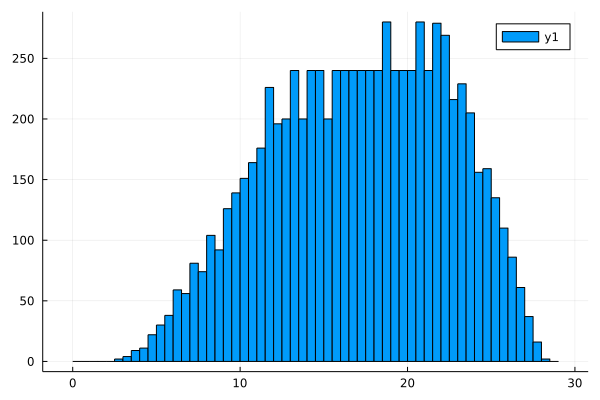

In [24]:
using Plots, Distributions
histogram(NH[:,1]; bins = 0:0.5:29)


In [28]:
p

30×3 Matrix{Float64}:
  5.0      10.0      30.0
  5.88671   6.56918  31.8334
  2.69766  11.0999   31.2327
  4.2165    9.55452  30.173
  8.57472   7.44828  29.1742
  4.30975   5.05839  28.9603
  5.81313  15.7304   32.4952
  8.70529  10.3099   27.7643
  7.98841  12.9789   33.4011
  7.68962  12.9392   32.9672
  ⋮                  
 15.9926   16.4591   35.355
  9.06656  15.6828   36.0156
 15.7333   16.0573   32.9492
 17.9778   16.0967   39.5783
 17.2603   15.0403   36.1751
 17.6401   14.1535   42.9554
 18.8456   17.6203   38.3575
 24.2067   17.3592   40.6345
 22.002    17.1346   40.0461

In [30]:
#Price dynamics
using Plots, DataFrames

function pricedynamics(T::Int64;cal=cal,N=3)
#Time and number of household considered
    #Get our price level dynamics
    shock_size=2
    index=100.0 
    pp=[p[1]]  #price primary
    pn=[p[2]]  #price normal
    pl=[p[3]]  #price luxury
    agg=[1/N*(p[1]+p[2]+p[3])] #aggregate price with homothetic

    for t=1:T-1
        p_p=p[1]*cal.g[1]^(t)+shock_size*randn() # price dynamics of primary goods
        p_n=p[2]*cal.g[2]^(t)+shock_size*randn() # price dynamics of normal goods
        p_l=p[3]*cal.g[3]^(t)+shock_size*randn()
        agg_p=0.333*p_p+0.333*p_n+0.333*p_l #share coming from homothetic consumption bundle

        pp=push!(pp,p_p)
        pn=push!(pn,p_n)
        pl=push!(pl,p_l)
        agg=push!(agg,agg_p)
    end

    pricesplot = [pp pn pl agg]
    return plot(pricesplot, title="Prices dynamics", label=["Primary" "Normal" "Luxury" "Aggregate"], lw=2)
end
    

pricedynamics (generic function with 1 method)

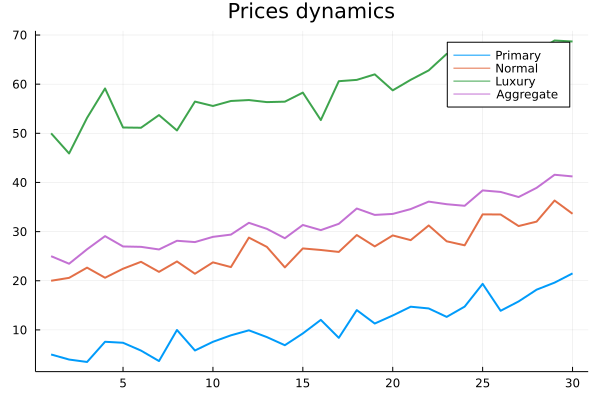

In [31]:
pricedynamics(30)

In [98]:
p

30×3 Matrix{Float64}:
  5.0      10.0      30.0
  5.42028  12.3144   31.8754
  4.95452  11.3943   29.015
  7.41052   7.05747  31.7708
  7.56492  10.0484   32.7782
  8.75066  12.0812   30.9974
 10.3087   10.9119   30.1693
  7.13857  12.4908   32.3337
  7.84003  10.426    32.0023
  8.7507   15.4704   35.5509
  ⋮                  
 14.443    12.2219   37.7398
 16.8274   12.757    36.5994
 19.1009   16.1929   41.4909
 19.2584   16.6044   42.2904
 18.6914   20.5005   36.7098
 17.8045   13.7493   36.213
 19.5488   15.7465   42.2832
 18.2465   17.9579   39.597
 21.3165   17.011    41.5713

In [110]:
p=[10.0, 20.0, 70.0]

3-element Vector{Float64}:
 10.0
 20.0
 70.0

In [111]:
function prices(T::Int64 , p::Matrix{Float64};cal=cal)
    #Prices normalized at date t=1
    pp=[p[1]]  #price primary
    pn=[p[2]]  #price normal
    pl=[p[3]]  #price luxury
    #Relative prices
    pnp_r=[1.0]
    pnl_r=[1.0]
    #AR(1)
    shock_size=2

    for t=1:T-1
        p_p=p[1]*cal.g[1]^(t)+shock_size*randn() # price dynamics of primary goods
        p_n=p[2]*cal.g[2]^(t)+shock_size*randn() # price dynamics of normal goods
        p_l=p[3]*cal.g[3]^(t)+shock_size*randn()

        pnp=p_p/p_n
        pnl=p_l/p_n

        #for matrix
        pp=push!(pp,p_p)
        pn=push!(pn,p_n)
        pl=push!(pl,p_l)

        pnp_r=push!(pnp_r,pnp)
        pnl_r=push!(pnl_r,pnl)
        
    end
    return [pp pn pl]
end

T=30
p=prices(T, p)

data=DataFrame(p,:auto)

rename!(data,[:"Primary P",:"Normal P", :"LuxuryP"])

,Primary P,Normal P,LuxuryP
,Float64,Float64,Float64
1,10.0,20.0,70.0
2,10.2154,20.7301,69.6731
3,10.326,21.041,69.7134
4,10.7888,21.2713,68.8945
5,10.671,22.4133,75.6296
6,15.8038,21.8545,74.5708
7,11.4533,23.0503,73.1206
8,15.5538,21.3733,75.174
9,17.7824,22.9291,75.3219


In [112]:
p

30×3 Matrix{Float64}:
 10.0     20.0      70.0
 10.2154  20.7301   69.6731
 10.326   21.041    69.7134
 10.7888  21.2713   68.8945
 10.671   22.4133   75.6296
 15.8038  21.8545   74.5708
 11.4533  23.0503   73.1206
 15.5538  21.3733   75.174
 17.7824  22.9291   75.3219
 16.16    23.545    75.432
  ⋮                
 25.3035  30.4316   87.2708
 26.8422  27.9842   86.3294
 31.5837  31.8554   88.8127
 30.939   33.0271   86.987
 33.0497  36.8483   87.2963
 33.0226  32.4686   94.7468
 40.6736  33.0607   92.0672
 38.0451  36.2448   91.9599
 41.0154  39.93    100.17

In [199]:
p[3,:]

3-element Vector{Float64}:
  7.072969229779318
  9.054691412987259
 30.10041728465472

In [113]:
function NHUtilityExp(C::Vector{Float64}, p::Vector{Float64}, E; cal=cal,tol=1e-10,T=100)
    res = nlsolve(u->[solvingNH(u[1], C, p)], [1.0])
    #Utility level for given C
    U=res.zero[1]
    #1st utility for given endowment level
    Uinit=res.zero[1]

    #Minimum expenditure for the utility at given endowment level
    Expmini=sum(cal.γ[i]*U^(cal.ϵ[i]*(1-cal.σ)) * (p[i]^(1-cal.σ)) for i = 1:length(C))^(1/(1-cal.σ))
    
    #Optimal Demand with income effect
    C1=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/Expmini)^(-cal.σ)
    C2=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/Expmini)^(-cal.σ)
    C3=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/Expmini)^(-cal.σ)

    #Expenditure share with income effect
    ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/Expmini)^(1-cal.σ)
    ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/Expmini)^(1-cal.σ)
    ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/Expmini)^(1-cal.σ)

    #Initial Demand for given endowment level, U initial and minimum expenditure level
    Cinit=[C1,C2,C3]
    ω_init=[ω_p, ω_n, ω_l]

    #Optimal update for demand
    C=[C1,C2,C3]
    ω=[ω_p, ω_n, ω_l]

    #Non homothetic preferences updated expenditure since we still have some wealth unused.
    ExpNH=sum(p[i]*C[i] for i=1:length(C))

    #Non homothetic preferences Expenditure have to coincide with the endowment level wealth.
    if abs(E-ExpNH)>tol
        for j=1:T
            res=nlsolve(u->[solvingNH(u[1], C, p)], [1.0])
            U=res.zero[1]
            
            #DEMAND
            C1=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/E)^(-cal.σ)
            C2=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/E)^(-cal.σ)
            C3=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/E)^(-cal.σ)

            #SHARE
            ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[1]/E)^(1-cal.σ)
            ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[2]/E)^(1-cal.σ)
            ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[3]/E)^(1-cal.σ)

            C=[C1, C2, C3]
            ω=[ω_p, ω_n, ω_l]
    
            ExpNH=sum(p[i]*C[i] for i =1:length(C)) 
        end
        return [U, ExpNH, C, ω] #[U, Uinit, miniEforUinit, E,  ExpNH, C, Cinit, ω, ω_init]
    end
end

NHUtilityExp (generic function with 2 methods)

In [67]:
p[20,:]

3-element Vector{Float64}:
 13.628781851845481
 13.048021978437014
 39.165486340975775

In [114]:
function NHUtilitytime(C::Vector{Float64}, p::Matrix{Float64}, T::Int64;cal=cal,tol=1e-10)
    res = nlsolve(u->[solvingNH(u[1], C, p[1,:])], [1.0])
    Exp=[]
    miniExp=[]
    Cons=[]
    Share=[]
    NH=[]
    Utility=[]

    #Utility level for given C
    U=res.zero[1]
    #1st utility for given endowment level
    Uinit=res.zero[1]

    for t=1:T
        #Wealth level
        E=sum(p[t,i]*C[i] for i = 1:length(C))
        
        #Minimum expenditure for the utility at given endowment level
        miniEforUinit=sum(cal.γ[i]*U^(cal.ϵ[i]*(1-cal.σ)) * (p[t,i]^(1-cal.σ)) for i = 1:length(C))^(1/(1-cal.σ))
        
        #Optimal demand with income effect
        c_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[t,1]/miniEforUinit)^(-cal.σ)
        c_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[t,2]/miniEforUinit)^(-cal.σ)
        c_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[t,3]/miniEforUinit)^(-cal.σ)
        
        #Expenditure share with income effect
        ω_p=cal.γ[1]*U^(cal.ϵ[1]*(1-cal.σ))  * (p[t,1]/miniEforUinit)^(1-cal.σ)
        ω_n=cal.γ[2]*U^(cal.ϵ[2]*(1-cal.σ))  * (p[t,2]/miniEforUinit)^(1-cal.σ)
        ω_l=cal.γ[3]*U^(cal.ϵ[3]*(1-cal.σ))  * (p[t,3]/miniEforUinit)^(1-cal.σ)
        
        Consumption=[c_p, c_n, c_l]
        price=p[t,:]

        res=nlsolve(u->[solvingNH(u[1], Consumption, price)], [1.0])
        U=res.zero[1]
        
        NHmax=NHUtilityExp(Consumption, price, E)
        Cons=push!(Cons, Consumption)
        
        ω=[ω_p, ω_n, ω_l]
        Share=push!(Share, ω)
        Utility=push!(Utility, U)

        Exp=push!(Exp,E)
        miniExp=push!(miniExp,miniEforUinit)
        NH=push!(NH, NHmax)
    end

    #STORE VALUE
    value=[]
    for v=1:4
        for t =1:T
        val=NH[t][v]
        value=push!(value,val)
        end
    end
    NH=(reshape(value,T,4))

    return [Utility Cons Share NH]
end

NHUtilitytime (generic function with 3 methods)

In [115]:
X=NHUtilitytime([10.0, 20.0, 5.0], p, 30)

30×7 Matrix{Any}:
 7.30419  [1.85116, 3.04495, 5.25044]  …  [0.0308516, 0.117505, 0.851643]
 7.30419  [1.84402, 3.02441, 5.25747]     [0.0311185, 0.120363, 0.848518]
 7.30419  [1.84117, 3.01724, 5.26004]     [0.0312351, 0.121378, 0.847386]
 7.30419  [1.82284, 3.00696, 5.26597]     [0.0323428, 0.122778, 0.844879]
 7.30419  [1.85744, 3.02551, 5.25521]     [0.0302827, 0.120273, 0.849444]
 7.30419  [1.71846, 3.04318, 5.27413]  …  [0.040783, 0.11694, 0.842277]
 7.30419  [1.82385, 2.99629, 5.26914]     [0.03217, 0.124361, 0.843469]
 7.30419  [1.72486, 3.05836, 5.2684]      [0.0403917, 0.114893, 0.844716]
 7.30419  [1.68564, 3.02711, 5.28627]     [0.0436104, 0.118954, 0.837435]
 7.30419  [1.71798, 3.01071, 5.28405]     [0.040453, 0.121569, 0.837978]
 ⋮                                     ⋱  
 7.30419  [1.62849, 2.9655, 5.32131]      [0.048654, 0.127678, 0.823668]
 7.30419  [1.60403, 3.00564, 5.31516]     [0.0520001, 0.121342, 0.826657]
 7.30419  [1.56943, 2.96035, 5.34211]     [0.0555745, 0.1

In [116]:
Umin=X[:,[1,4]];
C=X[:,[2,6]];
Share=X[:,[3,7]];
Exp=X[:,5];

In [117]:
C

30×2 Matrix{Any}:
 [1.85116, 3.04495, 5.25044]  [2.62239, 4.99398, 10.3414]
 [1.84402, 3.02441, 5.25747]  [2.63536, 5.02307, 10.5359]
 [1.84117, 3.01724, 5.26004]  [2.63966, 5.03401, 10.6073]
 [1.82284, 3.00696, 5.26597]  [2.63144, 5.06661, 10.7646]
 [1.85744, 3.02551, 5.25521]  [2.64806, 5.00728, 10.4805]
 [1.71846, 3.04318, 5.27413]  [2.49796, 5.1795, 10.9334]
 [1.82385, 2.99629, 5.26914]  [2.64349, 5.07765, 10.8564]
 [1.72486, 3.05836, 5.2684]   [2.49011, 5.15444, 10.7747]
 [1.68564, 3.02711, 5.28627]  [2.48436, 5.25545, 11.2628]
 [1.71798, 3.01071, 5.28405]  [2.52747, 5.21315, 11.2164]
 ⋮                            
 [1.62849, 2.9655, 5.32131]   [2.49586, 5.44593, 12.2508]
 [1.60403, 3.00564, 5.31516]  [2.44046, 5.46242, 12.0629]
 [1.56943, 2.96035, 5.34211]  [2.45817, 5.60951, 12.8436]
 [1.57217, 2.93204, 5.35158]  [2.48739, 5.63678, 13.1254]
 [1.55964, 2.88347, 5.37563]  [2.52914, 5.74351, 13.8462]
 [1.5731, 2.98242, 5.33308]   [2.44021, 5.57343, 12.5787]
 [1.50852, 2.97095, 5.36

In [118]:
Exp

30-element Vector{Any}:
  849.9999998879755
  865.1224116166258
  872.6473294444947
  877.7864036834276
  933.1250212247329
  967.9821933017633
  941.142064805008
  958.874347531405
 1013.0156212981368
 1009.6605654930393
    ⋮
 1298.020383186019
 1259.7522207204938
 1397.0087582743288
 1404.866981769048
 1503.945454880519
 1453.3329959070616
 1528.2849806912075
 1565.1459438269135
 1709.6022093488862

In [119]:
Umin

30×2 Matrix{Any}:
 7.30419  11.5442
 7.30419  11.6814
 7.30419  11.7314
 7.30419  11.8413
 7.30419  11.6425
 7.30419  11.9586
 7.30419  11.9052
 7.30419  11.8483
 7.30419  12.1859
 7.30419  12.1537
 ⋮        
 7.30419  12.853
 7.30419  12.7289
 7.30419  13.245
 7.30419  13.4276
 7.30419  13.889
 7.30419  13.0716
 7.30419  13.6407
 7.30419  13.8099
 7.30419  13.8286

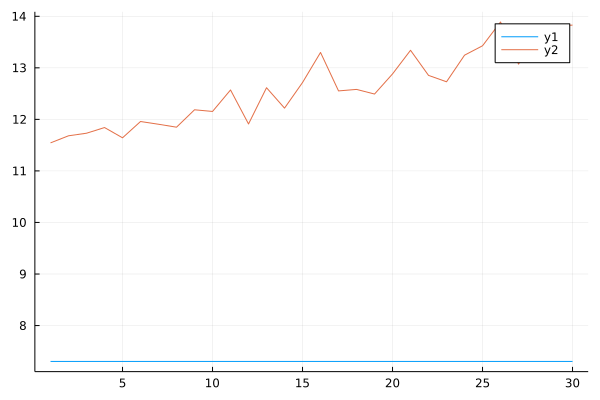

In [120]:
plot(Umin[:,1])
plot!(Umin[:,2])

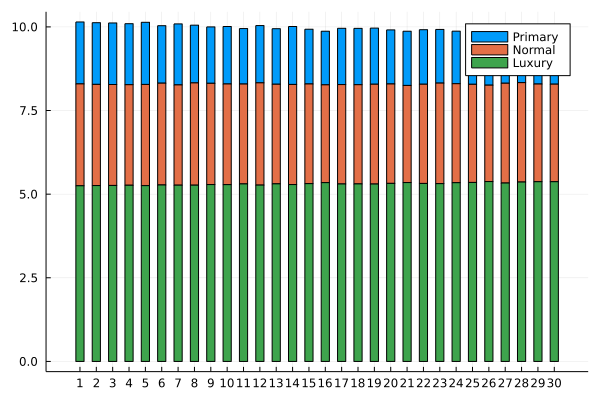

In [121]:
using StatsPlots
Primary=[]
Normal=[]
Luxury=[]
for t=1:T
    p=C[:,1][t][1]
    n=C[:,1][t][2]
    l=C[:,1][t][3]
    Primary_s=push!(Primary,p)
    Normal_s=push!(Normal,n)
    Luxury_s=push!(Luxury,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary Normal Luxury],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

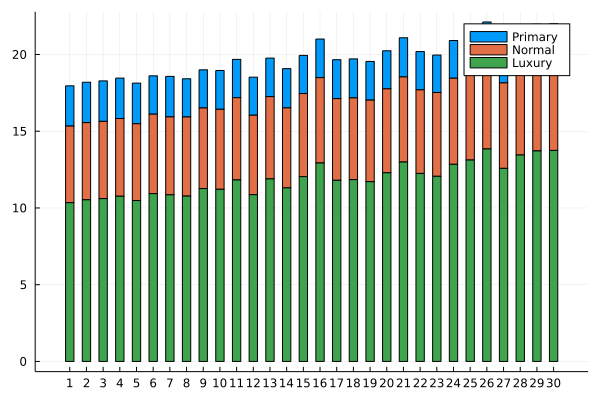

In [122]:
Primary_s=[]
Normal_s=[]
Luxury_s=[]
for t=1:T
    p=C[:,2][t][1]
    n=C[:,2][t][2]
    l=C[:,2][t][3]
    Primary_s=push!(Primary_s,p)
    Normal_s=push!(Normal_s,n)
    Luxury_s=push!(Luxury_s,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary_s Normal_s Luxury_s],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

In [123]:
Share

30×2 Matrix{Any}:
 [0.0414183, 0.136257, 0.822324]  [0.0308516, 0.117505, 0.851643]
 [0.0420631, 0.139998, 0.817939]  [0.0311185, 0.120363, 0.848518]
 [0.0423247, 0.141333, 0.816342]  [0.0312351, 0.121378, 0.847386]
 [0.0440528, 0.143276, 0.812671]  [0.0323428, 0.122778, 0.844879]
 [0.0408608, 0.139794, 0.819345]  [0.0302827, 0.120273, 0.849444]
 [0.0557707, 0.136576, 0.807653]  [0.040783, 0.11694, 0.842277]
 [0.043955, 0.145328, 0.810717]   [0.03217, 0.124361, 0.843469]
 [0.0549482, 0.133883, 0.811169]  [0.0403917, 0.114893, 0.844716]
 [0.0602438, 0.139499, 0.800257]  [0.0436104, 0.118954, 0.837435]
 [0.0558337, 0.142563, 0.801604]  [0.040453, 0.121569, 0.837978]
 ⋮                                
 [0.069156, 0.151457, 0.779387]   [0.048654, 0.127678, 0.823668]
 [0.0734713, 0.143528, 0.783001]  [0.0520001, 0.121342, 0.826657]
 [0.0801667, 0.152515, 0.767318]  [0.0555745, 0.127911, 0.816514]
 [0.0796101, 0.15849, 0.7619]     [0.0547792, 0.132515, 0.812705]
 [0.0822006, 0.169441, 0.7483

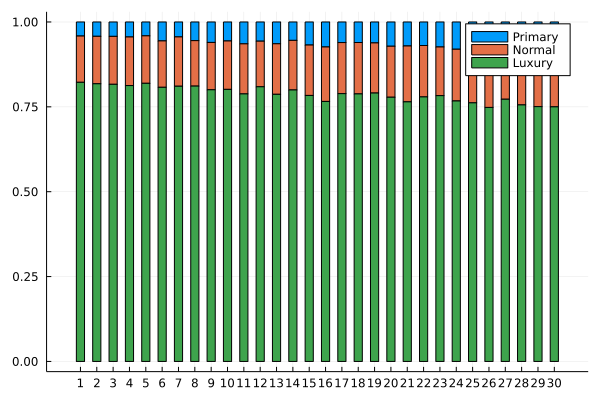

In [124]:
Primary_s=[]
Normal_s=[]
Luxury_s=[]
for t=1:T
    p=Share[:,1][t][1]
    n=Share[:,1][t][2]
    l=Share[:,1][t][3]
    Primary_s=push!(Primary_s,p)
    Normal_s=push!(Normal_s,n)
    Luxury_s=push!(Luxury_s,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary_s Normal_s Luxury_s],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])

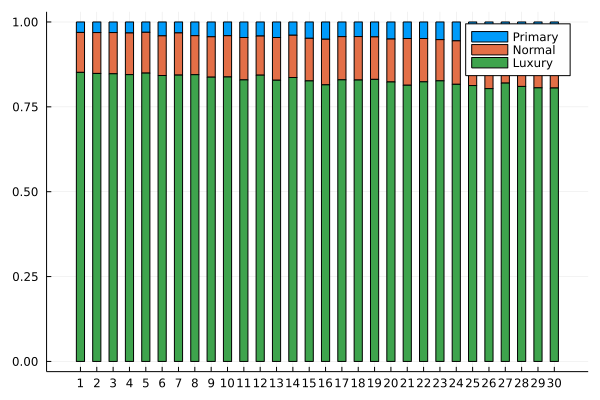

In [125]:
Primary_s=[]
Normal_s=[]
Luxury_s=[]
for t=1:T
    p=Share[:,2][t][1]
    n=Share[:,2][t][2]
    l=Share[:,2][t][3]
    Primary_s=push!(Primary_s,p)
    Normal_s=push!(Normal_s,n)
    Luxury_s=push!(Luxury_s,l)
end

ticklabel =[1:T 1:T 1:T]
groupedbar([Primary_s Normal_s Luxury_s],
        bar_position = :stack,
        bar_width=0.5,
        xticks=(1:T, ticklabel),
        label=["Primary" "Normal" "Luxury"])